In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('fish_data.csv')

In [4]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [5]:
df.shape

(4080, 4)

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(3971, 4)

In [8]:
df.species.value_counts()

species
Setipinna taty            476
Anabas testudineus        462
Otolithoides biauritus    456
Pethia conchonius         454
Polynemus paradiseus      454
Sillaginopsis panijus     429
Otolithoides pama         428
Coilia dussumieri         409
Puntius lateristriga      403
Name: count, dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.shape

(3971, 4)

In [11]:
df.describe()

,length,weight,w_l_ratio
count,3971.000000,3971.000000,3971.000000
mean,17.337076,3.728947,0.252110
std,7.066382,1.030543,0.122636
min,6.360000,2.050000,0.080000
25%,11.360000,3.070000,0.170000
50%,17.360000,3.310000,0.190000
75%,22.535000,4.090000,0.340000
max,33.860000,6.290000,0.640000


In [12]:
df.species.unique()

array(['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus'], dtype=object)

In [13]:
array=['Anabas testudineus', 'Coilia dussumieri',
       'Otolithoides biauritus', 'Otolithoides pama', 'Pethia conchonius',
       'Polynemus paradiseus', 'Puntius lateristriga', 'Setipinna taty',
       'Sillaginopsis panijus']

In [14]:
def array_to_map(arr):
    map={}
    count=0
    for i in arr:
        map[i]=count
        count+=1
    return map

In [15]:
map1=array_to_map(array)

In [16]:
df.species=df.species.map(map1)

In [17]:
df.head()

,species,length,weight,w_l_ratio
0,0,10.66,3.45,0.32
1,0,6.91,3.27,0.47
2,0,8.38,3.46,0.41
3,0,7.57,3.36,0.44
4,0,10.83,3.38,0.31


In [18]:
correlation=df.corr()

In [19]:
correlation

,species,length,weight,w_l_ratio
species,1.000000,0.332338,0.469140,-0.178668
length,0.332338,1.000000,0.402612,-0.740335
weight,0.469140,0.402612,1.000000,0.250905
w_l_ratio,-0.178668,-0.740335,0.250905,1.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

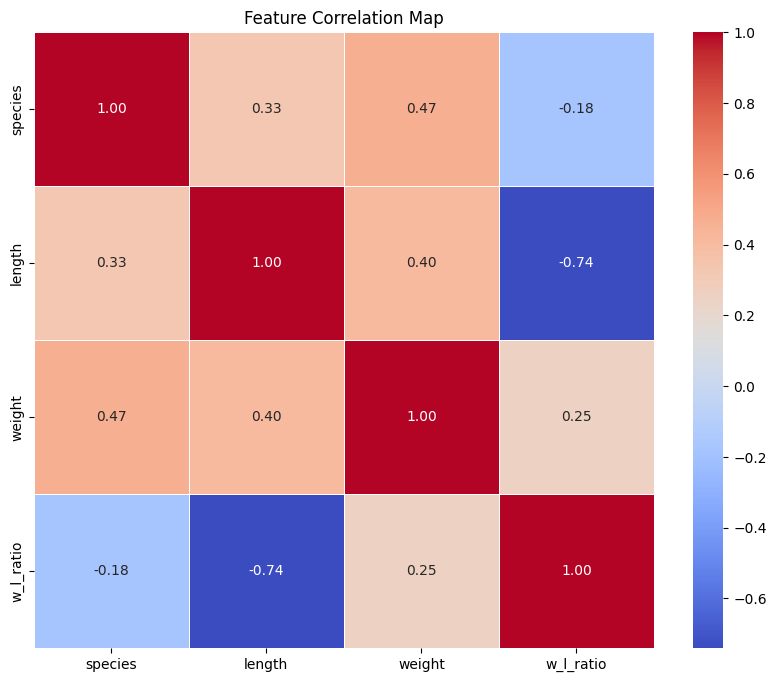

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Map")
plt.show()


In [22]:
len(array)

9

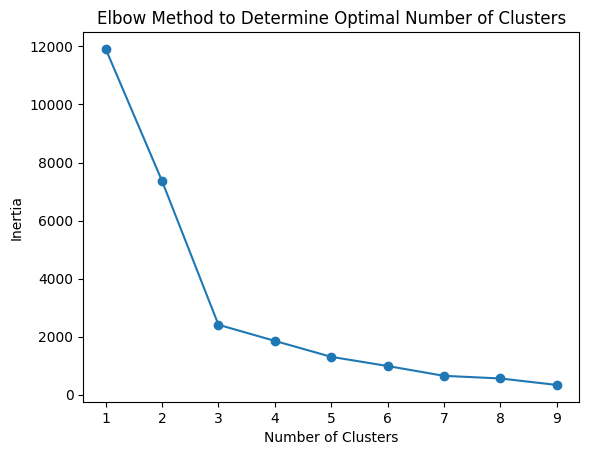

In [23]:
X = df.drop(columns=['species'])
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for n in range(1, 10):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [24]:
df.head()

,species,length,weight,w_l_ratio,Cluster
0,0,10.66,3.45,0.32,2
1,0,6.91,3.27,0.47,2
2,0,8.38,3.46,0.41,2
3,0,7.57,3.36,0.44,2
4,0,10.83,3.38,0.31,2


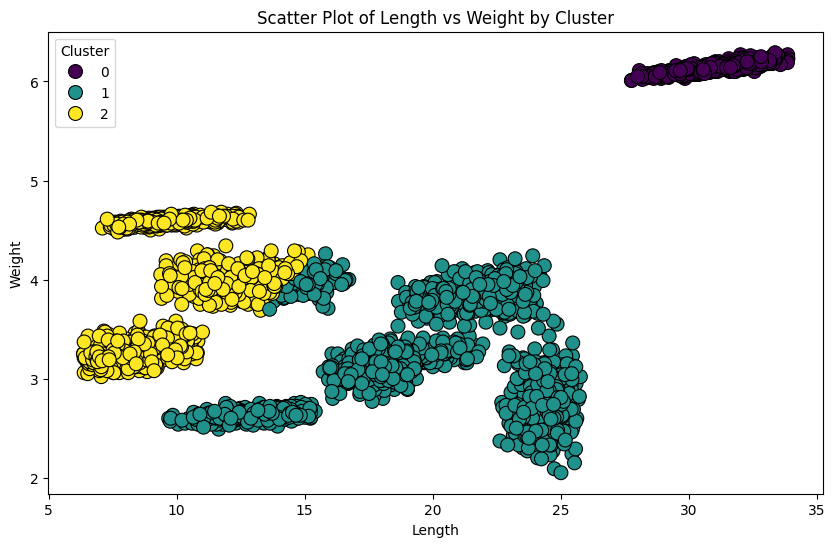

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='length', y='weight', hue='Cluster', palette='viridis', s=100, edgecolor='k')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('Scatter Plot of Length vs Weight by Cluster')
plt.legend(title='Cluster')
plt.show()

C:\Users\dharu\AppData\Local\Temp\ipykernel_17140\2921262000.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Density_Label'] = dbscan.labels_
C:\Users\dharu\AppData\Local\Temp\ipykernel_17140\2921262000.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['Density_Label'] = dbscan.labels_
C:\Users\dharu\AppData\Local\Temp\ipykernel_17140\2921262000.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

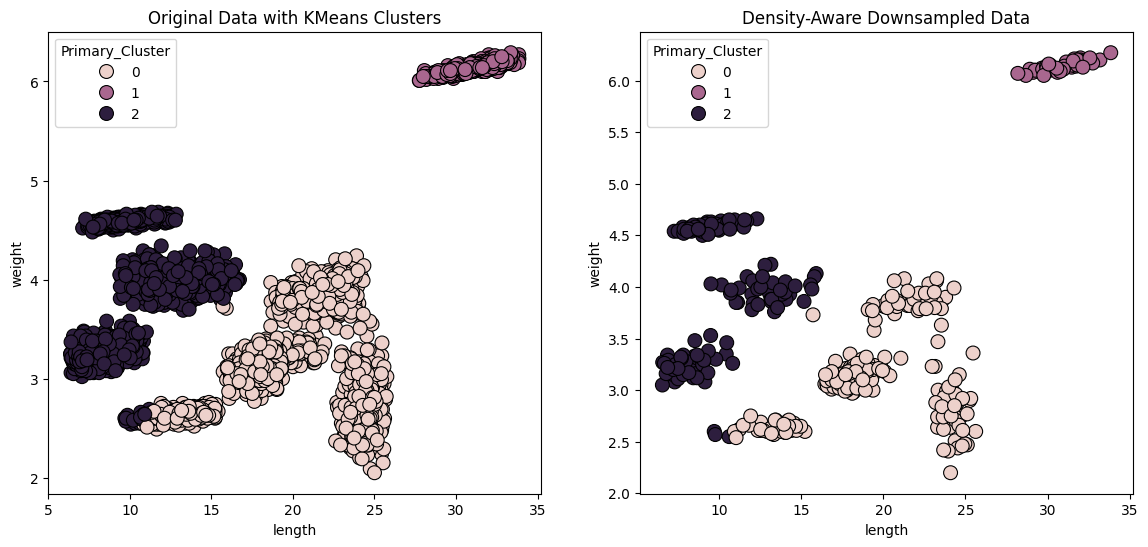

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(df[['length', 'weight']])

# Primary clustering using KMeans
n_clusters = 3  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Primary_Cluster'] = kmeans.fit_predict(X)

# Downsampling while preserving density-based structure
downsampled_df = pd.DataFrame()

# Fraction of points to retain (higher values to keep more data)
sample_fraction_dense = 0.1  # Fraction for dense regions
sample_fraction_sparse = 0.3  # Fraction for sparse regions

for cluster in df['Primary_Cluster'].unique():
    # Extract points in the current primary cluster
    cluster_data = df[df['Primary_Cluster'] == cluster]
    cluster_scaled_data = X[df['Primary_Cluster'] == cluster]

    # Secondary clustering within each primary cluster to detect density
    dbscan = DBSCAN(eps=0.3, min_samples=10).fit(cluster_scaled_data)
    cluster_data['Density_Label'] = dbscan.labels_
    
    # Separate dense (core points) from sparse (border points) regions
    dense_points = cluster_data[cluster_data['Density_Label'] != -1]
    sparse_points = cluster_data[cluster_data['Density_Label'] == -1]

    # Sample dense and sparse regions separately
    sampled_dense = dense_points.sample(frac=sample_fraction_dense, random_state=42)
    sampled_sparse = sparse_points.sample(frac=sample_fraction_sparse, random_state=42)

    # Combine sampled data for the current cluster
    downsampled_df = pd.concat([downsampled_df, sampled_dense, sampled_sparse], ignore_index=True)

# Plot original vs downsampled data
plt.figure(figsize=(14, 6))

# Original data plot with clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='length', y='weight', hue='Primary_Cluster', s=100, edgecolor='k')
plt.title("Original Data with KMeans Clusters")

# Downsampled data plot with density-aware sampling
plt.subplot(1, 2, 2)
sns.scatterplot(data=downsampled_df, x='length', y='weight', hue='Primary_Cluster', s=100, edgecolor='k')
plt.title("Density-Aware Downsampled Data")

plt.show()

In [39]:
downsampled_df=downsampled_df.drop(columns=['Density_Label'])

In [40]:
df.shape

(3971, 9)

In [41]:
downsampled_df.shape

(398, 9)

In [42]:
downsampled_df.head()

,species,length,weight,w_l_ratio,Cluster,DBSCAN_Labels,KMeans_Labels,Distance_from_Center,Primary_Cluster
0,5,14.29,3.93,0.27,1,0,2,0.574127,2
1,0,6.84,3.34,0.49,2,0,2,0.742370,2
2,6,9.69,2.60,0.27,1,0,2,1.286497,2
3,5,13.05,3.94,0.30,2,0,2,0.398920,2
4,0,8.18,3.25,0.40,2,0,2,0.715119,2


In [43]:
df.head()

,species,length,weight,w_l_ratio,Cluster,DBSCAN_Labels,KMeans_Labels,Distance_from_Center,Primary_Cluster
0,0,10.66,3.45,0.32,2,0,2,0.463226,2
1,0,6.91,3.27,0.47,2,0,2,0.789439,2
2,0,8.38,3.46,0.41,2,0,2,0.520535,2
3,0,7.57,3.36,0.44,2,0,2,0.664030,2
4,0,10.83,3.38,0.31,2,0,2,0.533926,2


In [44]:
train_df=downsampled_df.drop(columns=['Cluster','DBSCAN_Labels','KMeans_Labels','Distance_from_Center','Primary_Cluster'])

In [45]:
train_df.shape

(398, 4)

In [46]:
train_df.head()

,species,length,weight,w_l_ratio
0,5,14.29,3.93,0.27
1,0,6.84,3.34,0.49
2,6,9.69,2.60,0.27
3,5,13.05,3.94,0.30
4,0,8.18,3.25,0.40


In [47]:
train_df_2=df.drop(columns=['Cluster','DBSCAN_Labels','KMeans_Labels','Distance_from_Center','Primary_Cluster'])

In [49]:
train_df_2.shape

(3971, 4)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [84]:
def predictor(data):
    x=data.drop(columns=['species'])
    y=data['species']
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2022)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  
    rf_classifier.fit(x_train, y_train)
    y_pred=rf_classifier.predict(x_test)
    return y_pred,y_test
    
    


In [85]:
y_pred,y_test=predictor(train_df)

In [86]:
result

array([3, 6, 5, 0, 8, 3, 2, 7, 6, 2, 4, 0, 5, 5, 7, 4, 7, 1, 0, 8, 3, 8,
       0, 4, 7, 0, 8, 3, 3, 6, 1, 7, 3, 7, 3, 7, 4, 1, 5, 2, 3, 6, 8, 0,
       5, 8, 8, 1, 3, 3, 5, 1, 4, 3, 7, 4, 5, 2, 0, 4, 7, 5, 2, 3, 8, 5,
       6, 7, 6, 6, 0, 4, 8, 4, 2, 2, 3, 0, 3, 1], dtype=int64)

In [87]:
y_test

321    3
294    6
58     5
120    0
356    8
      ..
332    2
202    3
13     0
335    3
270    1
Name: species, Length: 80, dtype: int64

In [89]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Confusion Matrix:
 [[ 9  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  3  0]
 [ 0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  7  0  0]
 [ 0  0  1  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       0.86      0.67      0.75         9
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         7
           7       0.70      0.88      0.78         8
           8       1.00      1.00      1.00         9

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.